In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        total = np.dot(inputs, self.weights) + self.bias
        return self.activation(total)

    def train(self, X, y):
        for _ in range(self.epochs):
            total_error = 0
            for inputs, target in zip(X, y):
                output = self.predict(inputs)
                error = target - output
                self.weights += self.lr * error * inputs #main formula line 
                self.bias += self.lr * error
                total_error += abs(error)
            if total_error == 0:
                break

def train_and_test(gate_name, X, y):
    print(f"\nTraining Perceptron for {gate_name} gate")
    model = Perceptron(input_size=2, learning_rate=0.1, epochs=100)
    model.train(X, y)
    predictions = np.array([model.predict(x) for x in X])
    accuracy = np.mean(predictions == y) * 100
    print(f"Weights: {model.weights}, Bias: {model.bias}")
    print(f"Predictions: {predictions}")
    print(f"Accuracy: {accuracy:.2f}%")
    return model, predictions

# Truth tables
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and  = np.array([0,0,0,1])
y_or   = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])
y_xor  = np.array([0,1,1,0])

# Train for AND, OR, NAND
train_and_test("AND", X, y_and)
train_and_test("OR", X, y_or)
train_and_test("NAND", X, y_nand)




Training Perceptron for AND gate
Weights: [0.2 0.1], Bias: -0.20000000000000004
Predictions: [0 0 0 1]
Accuracy: 100.00%

Training Perceptron for OR gate
Weights: [0.1 0.1], Bias: -0.1
Predictions: [0 1 1 1]
Accuracy: 100.00%

Training Perceptron for NAND gate
Weights: [-0.2 -0.1], Bias: 0.2
Predictions: [1 1 1 0]
Accuracy: 100.00%


(<__main__.Perceptron at 0x132577f3ce0>, array([1, 1, 1, 0]))


Training Perceptron for XOR gate
Weights: [-0.1  0. ], Bias: 0.0
Predictions: [1 1 0 0]
Accuracy: 50.00%

Confusion Matrix for XOR:
[[1 1]
 [1 1]]


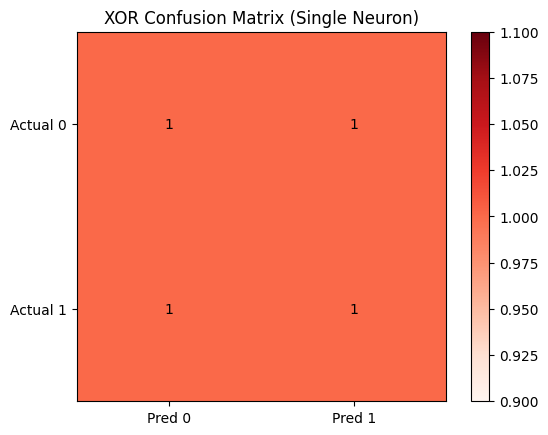

Input: [0 0], Predicted: 1, Actual: 0 -> Misclassified
Input: [0 1], Predicted: 1, Actual: 1 -> Correct
Input: [1 0], Predicted: 0, Actual: 1 -> Misclassified
Input: [1 1], Predicted: 0, Actual: 0 -> Correct

NOTE: XOR is not linearly separable; a single perceptron will always misclassify some points.


In [10]:
# Train for XOR (will fail to classify perfectly)
xor_model, xor_preds = train_and_test("XOR", X, y_xor)

# --- Custom confusion matrix (no sklearn needed) ---
def confusion_matrix_manual(y_true, y_pred):
    cm = np.zeros((2, 2), dtype=int)
    for actual, pred in zip(y_true, y_pred):
        cm[actual][pred] += 1
    return cm

cm = confusion_matrix_manual(y_xor, xor_preds)
print("\nConfusion Matrix for XOR:")
print(cm)

# Plot confusion matrix manually
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Reds')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Pred 0', 'Pred 1'])
ax.set_yticklabels(['Actual 0', 'Actual 1'])
plt.title("XOR Confusion Matrix (Single Neuron)")

# Annotate cells with counts
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im)
plt.show()

# Print which points were misclassified
for x, pred, actual in zip(X, xor_preds, y_xor):
    status = "Correct" if pred == actual else "Misclassified"
    print(f"Input: {x}, Predicted: {pred}, Actual: {actual} -> {status}")

print("\nNOTE: XOR is not linearly separable; a single perceptron will always misclassify some points.")


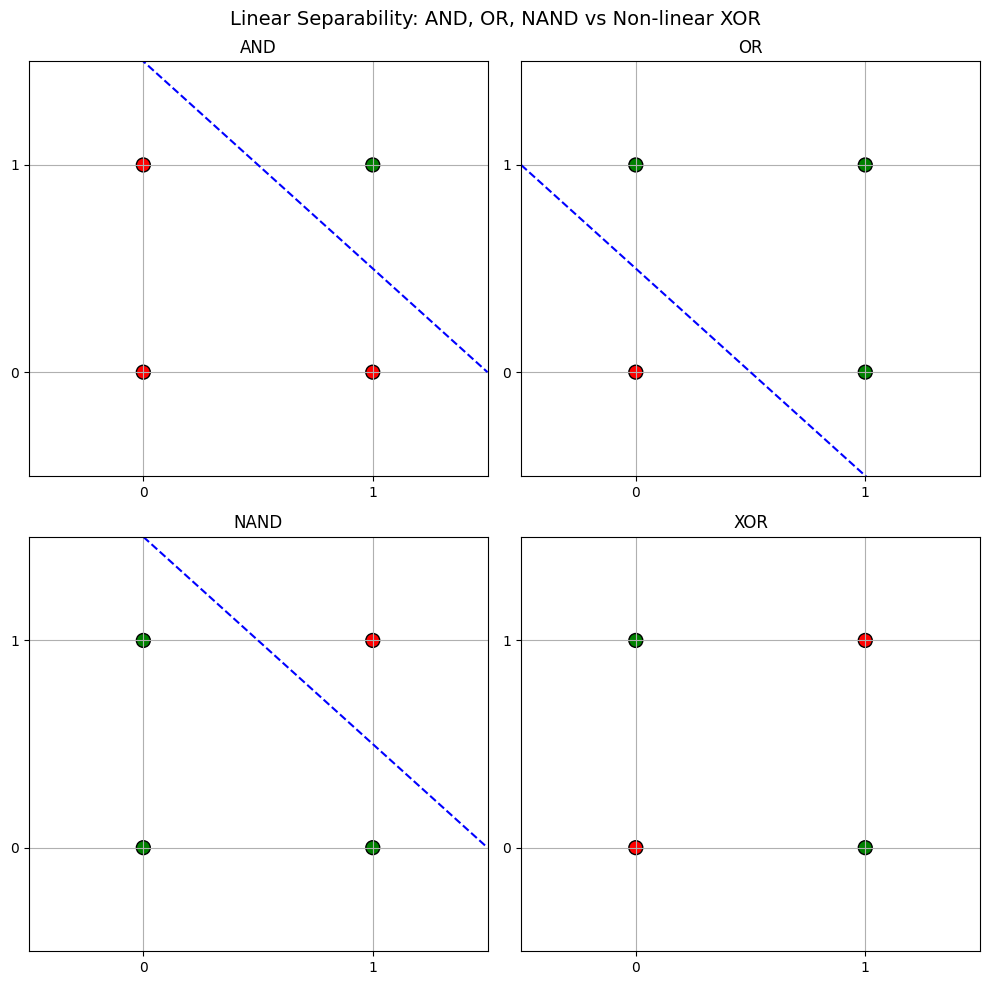

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs for all gates
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# Outputs for the gates
y_and  = np.array([0,0,0,1])
y_or   = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])
y_xor  = np.array([0,1,1,0])

gates = {
    "AND": y_and,
    "OR": y_or,
    "NAND": y_nand,
    "XOR": y_xor
}

# Helper function to plot points and a separating line if possible
def plot_gate(ax, X, y, title):
    colors = ['red' if label == 0 else 'green' for label in y]
    ax.scatter(X[:,0], X[:,1], c=colors, s=100, edgecolor='k')
    ax.set_title(title)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.grid(True)

    # Try to plot a separating line for linear gates (AND, OR, NAND)
    # We manually choose simple linear boundaries for illustration.
    if title == "AND":
        # Line: x1 + x2 = 1.5 (above this, output=1)
        x_vals = np.linspace(-0.5,1.5,100)
        y_vals = -x_vals + 1.5
        ax.plot(x_vals, y_vals, 'b--')
    elif title == "OR":
        # Line: x1 + x2 = 0.5 (above this, output=1)
        x_vals = np.linspace(-0.5,1.5,100)
        y_vals = -x_vals + 0.5
        ax.plot(x_vals, y_vals, 'b--')
    elif title == "NAND":
        # Line: x1 + x2 = 1.5 (below this, output=1)
        x_vals = np.linspace(-0.5,1.5,100)
        y_vals = -x_vals + 1.5
        ax.plot(x_vals, y_vals, 'b--')
    # For XOR we intentionally don't draw a single line, since it can't separate classes.

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10,10))

for ax, (gate_name, labels) in zip(axes.ravel(), gates.items()):
    plot_gate(ax, X, labels, gate_name)

plt.suptitle("Linear Separability: AND, OR, NAND vs Non-linear XOR", fontsize=14)
plt.tight_layout()
plt.show()
